In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd 
import openpyxl
import numpy as np
import re
import pandas as pd
import datetime
import seaborn as sns
import matplotlib
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'
import numpy as np
plt.style.use('seaborn')
import japanize_matplotlib



In [2]:
years = list(range(2017, 2020))

In [3]:
years

[2017, 2018, 2019]

In [4]:
cons_df = []
for year in years:
    df = pd.read_excel(f'./data/GAS_EMISSION_PER_CITY/{year}/燃料消費量.xls', skiprows=0)
    df.columns = range(len(df.columns))
    df.drop(columns=[0], inplace=True)
    df = df.iloc[2:, :]
    columns = df.iloc[0:1].values.tolist()[0]
    columns.pop(1)
    columns.insert(0, "地域区分")
    df.columns = columns
    df["地域区分"] = df["地域区分"].fillna(method="ffill") 
    df1 = df.iloc[3:33, :]

    df2 = df.iloc[38:, :]

    df = pd.concat([df1, df2])

    df.loc[df["地域区分"] == "北海道", "都道府県"] = "北海道"
    df.reset_index(drop=True, inplace=True)
    df["年"] = year
    df = df[["年"] + df.columns[:-1].values.tolist()]
    cons_df.append(df)
    
cons_df = pd.concat(cons_df)

cons_df = cons_df.reset_index(drop=True)

In [5]:
cons_df

年 地域区分 都道府県       合計   普通貨物    小型貨物     バス      乗用車
0    2017  北海道  北海道  2451122  17844  291730  16957  2124591
1    2017   東北   青森   655483   1259  104083   3904   546238
2    2017   東北   岩手   711340   2116  122062   3497   583664
3    2017   東北   宮城  1142703   3826  161709   5624   971544
4    2017   東北   秋田   553457   1064   97569   2706   452118
..    ...  ...  ...      ...    ...     ...    ...      ...
136  2019   九州   熊本   840700   2116  153170   4777   680636
137  2019   九州   大分   585278    665  121272   3704   459638
138  2019   九州   宮崎   562100   1379  107573   3653   449494
139  2019   九州  鹿児島   830500   1250  168692   5961   654597
140  2019   九州   沖縄   821461   2472  124127  10884   683978

[141 rows x 8 columns]

In [6]:
mile_df = []
for year in years:
    df = pd.read_excel(f'./data/GAS_EMISSION_PER_CITY/{year}/走行キロ.xls', skiprows=0)
    df.columns = range(len(df.columns))
    df.drop(columns=[0], inplace=True)
    df = df.iloc[2:, :]
    columns = df.iloc[0:1].values.tolist()[0]
    columns.pop(1)
    columns.insert(0, "地域区分")
    df.columns = columns
    df["地域区分"] = df["地域区分"].fillna(method="ffill") 
    df1 = df.iloc[3:33, :]

    df2 = df.iloc[38:, :]

    df = pd.concat([df1, df2])

    df.loc[df["地域区分"] == "北海道", "都道府県"] = "北海道"
    df.reset_index(drop=True, inplace=True)
    df["年"] = year
    df = df[["年"] + df.columns[:-1].values.tolist()]
    mile_df.append(df)
    
mile_df = pd.concat(mile_df)

mile_df = mile_df.reset_index(drop=True)

In [7]:
mile_df

年 地域区分 都道府県        合計    普通貨物     小型貨物      バス       乗用車
0    2017  北海道  北海道  26987645  110697  3272637  123145  23481167
1    2017   東北   青森   7879135   10178  1363902   25436   6479620
2    2017   東北   岩手   8763960   14552  1534647   29299   7185462
3    2017   東北   宮城  13896792   27209  1991003   38211  11840369
4    2017   東北   秋田   7035145    6663  1247342   23936   5757204
..    ...  ...  ...       ...     ...      ...     ...       ...
136  2019   九州   熊本  11592853   16323  1870923   35828   9669779
137  2019   九州   大分   7841228    7813  1306130   24200   6503085
138  2019   九州   宮崎   7987232    9527  1463035   28441   6486230
139  2019   九州  鹿児島  11308715    9754  2170749   41206   9087006
140  2019   九州   沖縄   9511348   16698  1496659   39368   7958622

[141 rows x 8 columns]

In [8]:
# 単位：千km
# 単位：kl

In [9]:
# def get_density(s):
#     columns = ['都道府県', '都道府県庁所在地', '都道府県庁所在地2', '都道府県庁所在地3', '人口（人）', '面積（km2）', '人口密度（人/km2）']
#     s = s.split('\n')
#     res = []
#     for v in s:
#         row = v.split('\t')
#         res.append(row)
#     df = pd.DataFrame(res, columns=columns)
#     df = df[columns[0:1] + columns[4:]]
#     return df

# df = get_density(s)
# df.to_excel('./data/POPULATION/2019.xlsx')

In [10]:
pop_df = []
for year in years:
    df = pd.read_excel(f'./data/POPULATION/{year}.xlsx', index_col=0)
    columns = df.columns.values.tolist()
    df["年"] = year
    df = df[["年"] + columns]
    pop_df.append(df)
pop_df = pd.concat(pop_df)

pop_df = pop_df.reset_index(drop=True)
pop_df["人口（人）"] = pd.to_numeric(pop_df["人口（人）"].apply(lambda x: x.replace(',', '')))
pop_df["面積（km2）"] =  pd.to_numeric(pop_df["面積（km2）"].apply(lambda x: x.replace(',', '')))
pop_df["人口密度（人/km2）"] =  pd.to_numeric(pop_df["人口密度（人/km2）"].apply(lambda x: x.replace(',', '')))



In [11]:
pop_df

年  都道府県    人口（人）   面積（km2）  人口密度（人/km2）
0    2017   北海道  5320523  83423.84        67.85
1    2017   青森県  1278450   9645.64       132.54
2    2017   岩手県  1254807  15275.01        82.15
3    2017   宮城県  2322024   7282.22       318.86
4    2017   秋田県   995380  11637.52        85.53
..    ...   ...      ...       ...          ...
136  2019   熊本県  1746740   7409.45       235.74
137  2019   大分県  1134431   6340.76       178.91
138  2019   宮崎県  1072077   7735.33       138.59
139  2019  鹿児島県  1599984   9187.08       174.16
140  2019   沖縄県  1454184   2281.00       637.52

[141 rows x 5 columns]

In [12]:
pop_df["人口密度（人/km2）"] 

0       67.85
1      132.54
2       82.15
3      318.86
4       85.53
        ...  
136    235.74
137    178.91
138    138.59
139    174.16
140    637.52
Name: 人口密度（人/km2）, Length: 141, dtype: float64

In [13]:
df = pd.DataFrame({"a": pop_df["都道府県"].sort_values().unique(), "b": cons_df["都道府県"].sort_values().unique()})
df.sort_values(by=["a", "b"])

city_mapper = {}
for citya, cityb in df.values:
    city_mapper[citya] = cityb

pop_df["都道府県"] = pop_df["都道府県"].apply(lambda x: city_mapper[x])

In [14]:
df = mile_df[['年', '都道府県', '合計']]

In [15]:
df.rename(columns={"合計": "走行キロ（千km）"}, inplace=True)

/tmp/ipykernel_7697/3491527252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"合計": "走行キロ（千km）"}, inplace=True)


In [16]:
df = df.sort_values(by=["年","都道府県", ])
df["燃料消費量（kl）"] = cons_df.sort_values(by=["年","都道府県"])["合計"]

In [17]:
df["人口密度"] = pop_df.sort_values(by=["年","都道府県", ])["人口密度（人/km2）"]

In [18]:
# km/l
df["燃料消費率"] = df ["走行キロ（千km）"] / (df["燃料消費量（kl）"] + 1e-12)

In [19]:
df = df.reset_index(drop=True)

In [20]:
df

年 都道府県 走行キロ（千km） 燃料消費量（kl）    人口密度      燃料消費率
0    2017   三重  12259788    994808  311.53  12.323773
1    2017   京都   9737445    807114  563.57  12.064522
2    2017   佐賀   5805501    418113  337.46  13.885005
3    2017   兵庫  23185351   1894440  199.87   12.23863
4    2017  北海道  26987645   2451122   67.85  11.010323
..    ...  ...       ...       ...     ...        ...
136  2019   静岡  21155338   1625626  467.93  13.013656
137  2019   香川   6223245    453488  509.42  13.723064
138  2019   高知   4788749    360368   98.21  13.288497
139  2019   鳥取   4009709    269031  158.44  14.904264
140  2019  鹿児島  11308715    830500  174.16  13.616755

[141 rows x 6 columns]

<p> F-test </p>

In [21]:
yearly_average = df.groupby(by=["都道府県"]).agg({"燃料消費率": "mean"}).reset_index()

In [22]:
yearly_average

都道府県      燃料消費率
0    三重  13.042707
1    京都  12.107809
2    佐賀  13.749760
3    兵庫  12.123370
4   北海道  11.133997
5    千葉  11.939225
6   和歌山  13.508717
7    埼玉  11.696302
8    大分  13.423901
9    大阪  11.222211
10   奈良  12.102563
11   宮城  12.515470
12   宮崎  14.073190
13   富山  12.446406
14   山口  13.616141
15   山形  12.935907
16   山梨  12.548130
17   岐阜  12.935768
18   岡山  13.098781
19   岩手  12.759264
20   島根  13.951399
21   広島  12.757317
22   徳島  12.878634
23   愛媛  13.309090
24   愛知  11.462114
25   新潟  13.302471
26   東京  10.082541
27   栃木  12.720258
28   沖縄  11.499744
29   滋賀  13.189784
30   熊本  13.620733
31   石川  12.534294
32  神奈川  10.815233
33   福井  12.884570
34   福岡  12.656816
35   福島  12.802892
36   秋田  13.033021
37   群馬  12.414514
38   茨城  12.875535
39   長崎  13.403176
40   長野  12.459760
41   青森  12.240247
42   静岡  12.462292
43   香川  13.272652
44   高知  13.457936
45   鳥取  13.994758
46  鹿児島  13.669571

In [23]:
average = df["燃料消費率"].mean()

In [24]:
average

12.696403667998851

In [25]:
num = 3 * ((yearly_average["燃料消費率"] - average) ** 2).sum() / 46

In [26]:
num

2.2314342081183383

In [27]:
den = (((df["燃料消費率"] - pd.concat([yearly_average] * 3)["燃料消費率"]) ** 2).sum()) / 94

In [28]:
den

0.22831679645590552

In [29]:
f_val = num / den

In [30]:
f_val

9.773412393464849

In [31]:
from scipy.stats import f
dfn, dfd = 46, 94
upper_bound = f.ppf(0.975, dfn, dfd)
lower_bound = f.ppf(0.025, dfn, dfd)
upper_bound, lower_bound

(1.6190261652723448, 0.5911177645326836)

Plot


• x – axis = log (popupation density ) , y-axis = fuel consumption rate

• x – axis = popupation density , y-axis = log (fuel consumption rate)

• x – axis = log(popupation density) , y-axis = log (fuel consumption rate)



In [60]:
def scatter_plot_fuel_pop_density(df, xscale=None, yscale=None):
    fig, axes = plt.subplots(1, 3, figsize=(20, 2))
    for i, year in enumerate(years):
        ax = axes[i]
        plot_df = df.loc[df["年"] == year, ['人口密度', '燃料消費率']]
        x, y = plot_df["人口密度"], plot_df["燃料消費率"]
        xlabel = ylabel = ""
        if xscale == "log":
            x = np.log(x)
            xlabel = "[log]"
        if yscale == "log":
            y = np.log(y.values.astype(float))
            ylabel = "[log]"
        
            
        ax.scatter(x, y,)
        xtitle = "人口密度"
        ytitle = "燃料消費率"
        if xscale == "log":
            xtitle = "log(人口密度)"
        
        if yscale == "log":
            ytitle = "log(燃料消費率"
        
        ax.set_title(f'{year}年　{ytitle}-{xtitle}',)
        plt.subplots_adjust(bottom=0.1, right=0.8, top=2)
        ax.set_xlabel(f"人口密度 (人/km2){xlabel}")
        ax.set_ylabel(f"燃料消費率 (km/l){ylabel}")


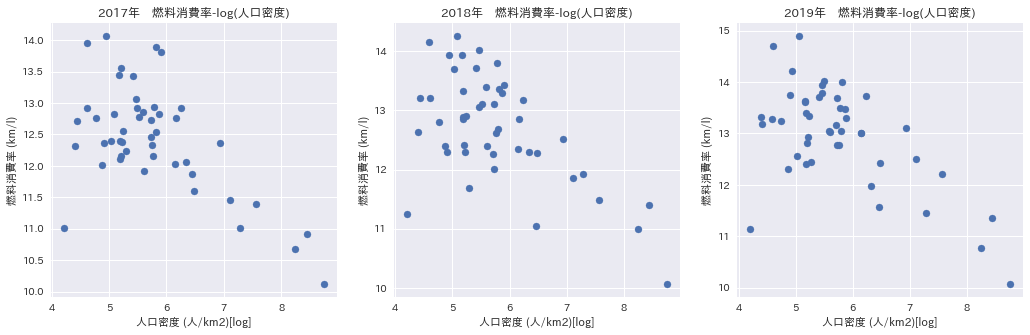

In [61]:
scatter_plot_fuel_pop_density(df, xscale="log")

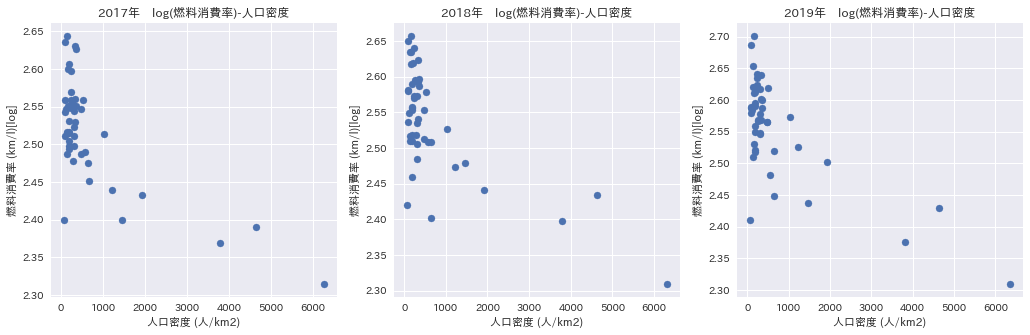

In [62]:
scatter_plot_fuel_pop_density(df, yscale="log")

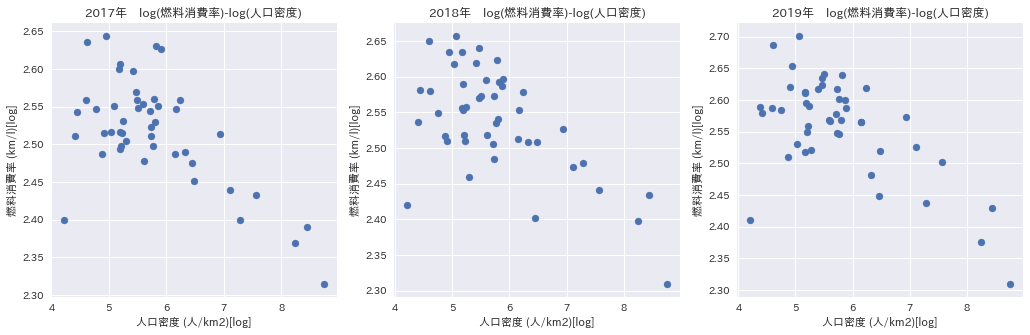

In [63]:
scatter_plot_fuel_pop_density(df, xscale="log", yscale="log")